# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 200 epochs - using third approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups.',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '200 epochs', 'handcrafted_3'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_3,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 200,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 6719
Process ID: 6908
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 200 '
                               'epochs - using third approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups.',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '200 epochs',
                         'handcrafted_3']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f807598

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


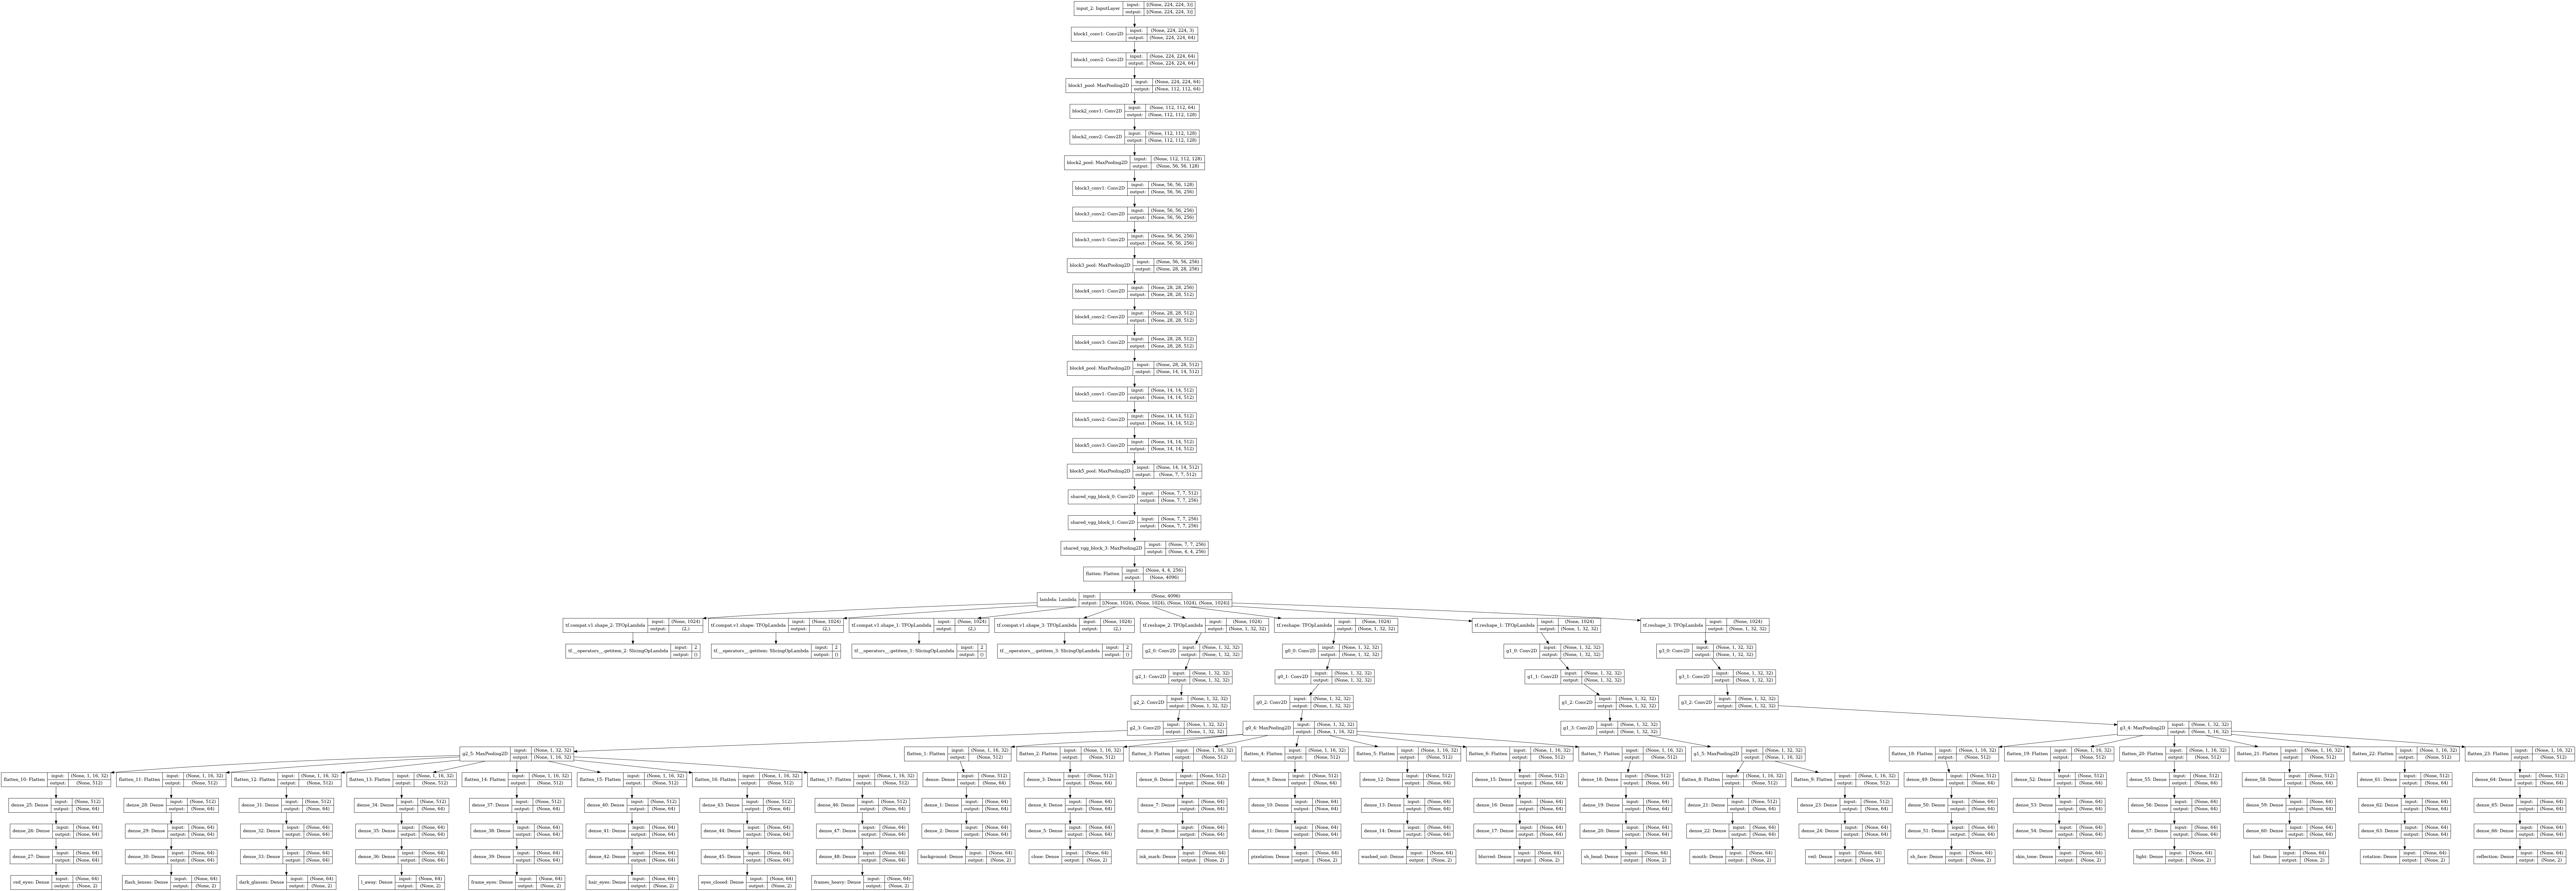

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_3.png")

In [11]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [12]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 17,555,310
  .. Trainable params: 2,840,622
  .. Non-trainable params: 14,714,688
Epoch 1/200


154/154 [==============================] - 470s 3s/step - loss: 1.1317 - background_loss: 0.6808 - close_loss: 0.7070 - ink_mark_loss: 0.8196 - pixelation_loss: 0.5914 - washed_out_loss: 0.1020 - blurred_loss: 0.5217 - sh_head_loss: 0.4951 - mouth_loss: 0.0332 - veil_loss: 0.6798 - red_eyes_loss: 0.6030 - flash_lenses_loss: 0.2973 - dark_glasses_loss: 0.7112 - l_away_loss: 0.3344 - frame_eyes_loss: 0.6836 - hair_eyes_loss: 0.6688 - eyes_closed_loss: 0.3959 - frames_heavy_loss: 0.0229 - sh_face_loss: 0.7227 - skin_tone_loss: 0.0653 - light_loss: 0.3082 - hat_loss: 0.6257 - rotation_loss: 0.6698 - reflection_loss: 0.5774 - background_accuracy: 0.7185 - close_accuracy: 0.7530 - ink_mark_accuracy: 0.6843 - pixelation_accuracy: 0.7843 - washed_out_accuracy: 0.9882 - blurred_accuracy: 0.8582 - sh_head_accuracy: 0.8853 - mouth_accuracy: 0.9972 - veil_accuracy: 0.7035 - red_eyes_accuracy: 0.7902 - flash_lenses_accuracy: 0.9316 - dark_glasses_accuracy: 0.5126 - l_away_accuracy: 0.9156 - frame_e

# Plots

-------------------- draw training history -------------------


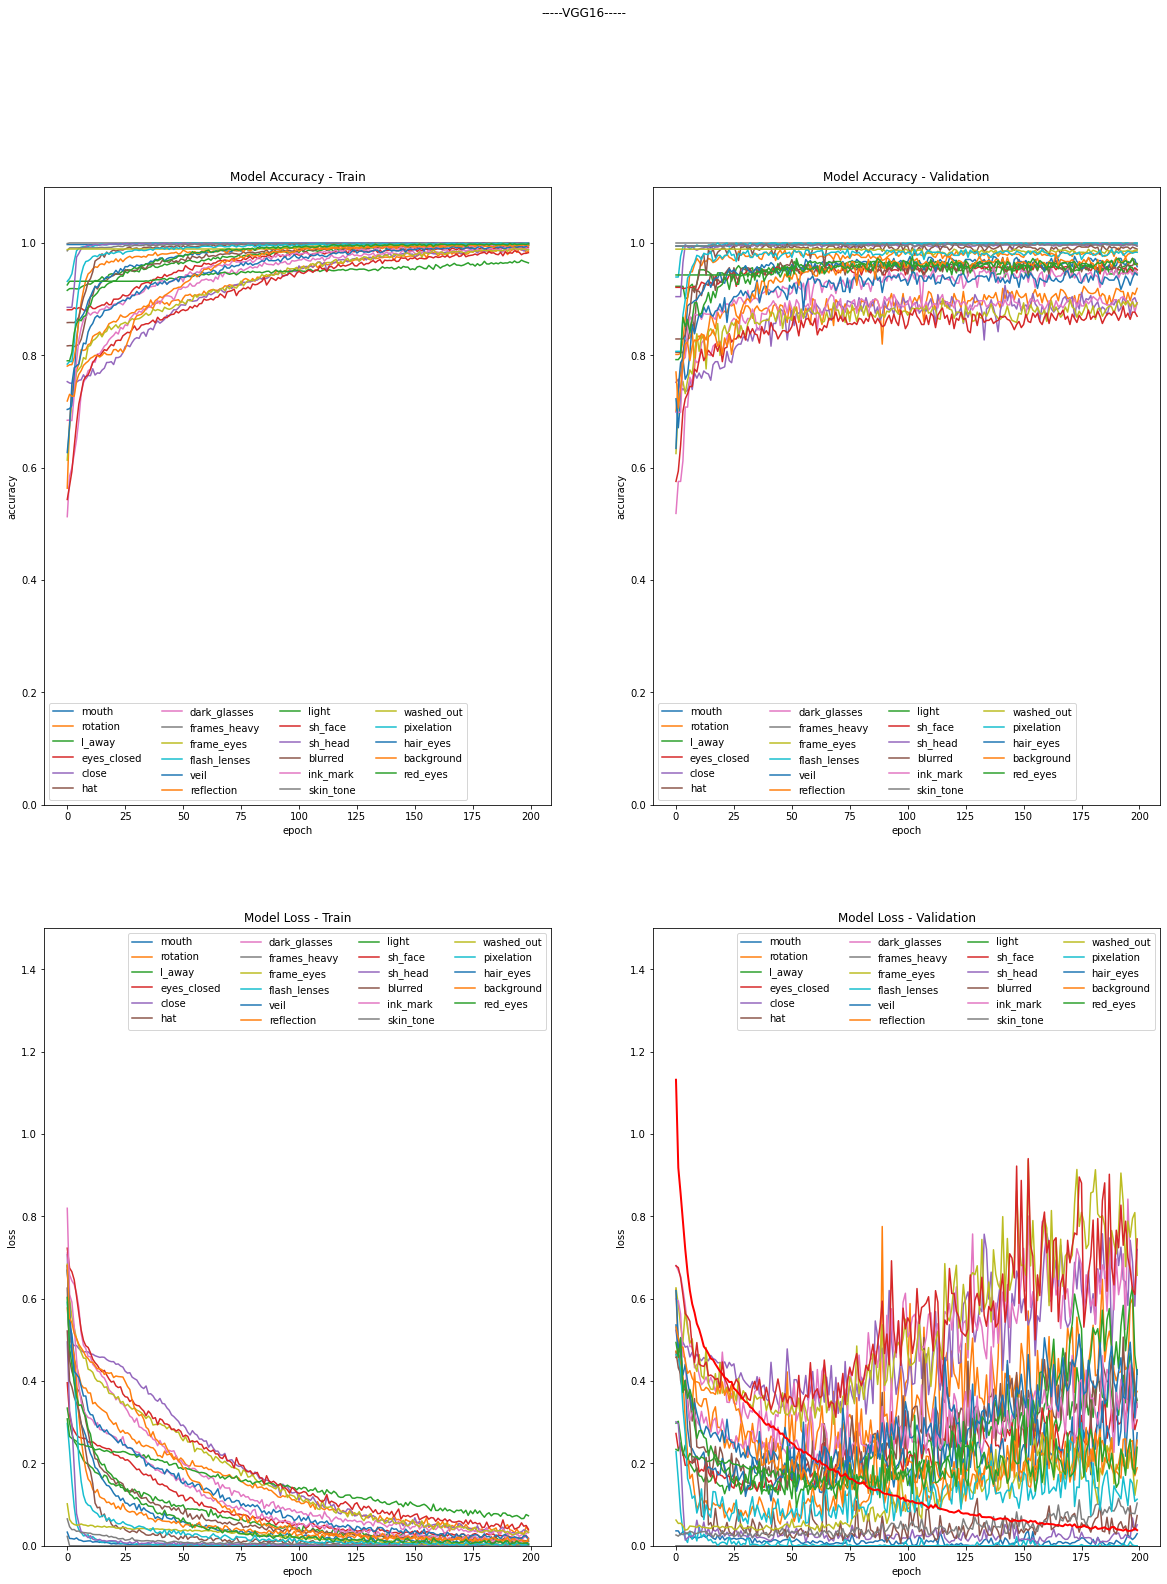

In [13]:
runner.draw_training_history()

# Load Best Model

In [14]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [15]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 33s 2s/step
Prediction finished!
Requisite: MOUTH


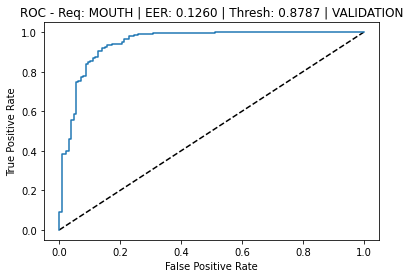

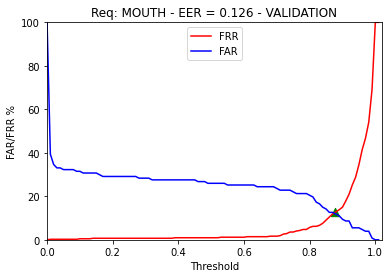

Requisite: MOUTH - EER_interp: 12.6% - Best Threshold: 0.8786711096763674
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.68      0.87      0.76       127
    COMPLIANT       0.96      0.87      0.91       420

     accuracy                           0.87       547
    macro avg       0.82      0.87      0.84       547
 weighted avg       0.89      0.87      0.88       547

Confusion matrix ----------------------------------------
FAR: 12.6% | FRR: 12.620000000000001% | EER_mean: 12.61% | TP: 367 | TN: 111 | FP: 16 | FN: 53
Accuracy ------------------------------------------------
Model Accuracy: 87.39%
---------------------------------------------------------
Requisite: ROTATION


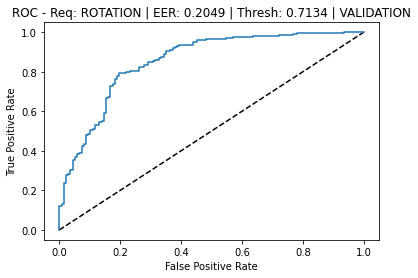

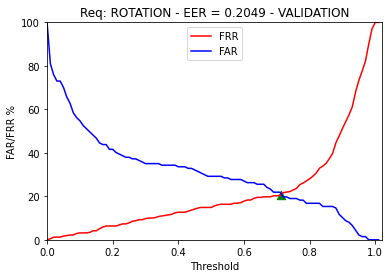

Requisite: ROTATION - EER_interp: 20.49% - Best Threshold: 0.7134111340452439
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.80      0.66       137
    COMPLIANT       0.92      0.80      0.85       410

     accuracy                           0.80       547
    macro avg       0.75      0.80      0.76       547
 weighted avg       0.83      0.80      0.81       547

Confusion matrix ----------------------------------------
FAR: 19.71% | FRR: 20.49% | EER_mean: 20.1% | TP: 326 | TN: 110 | FP: 27 | FN: 84
Accuracy ------------------------------------------------
Model Accuracy: 79.71000000000001%
---------------------------------------------------------
Requisite: L_AWAY


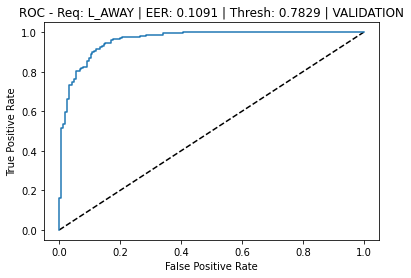

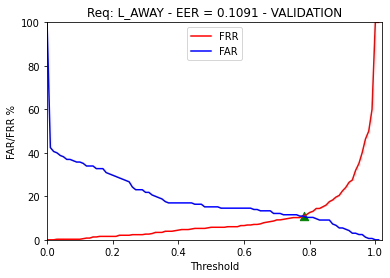

Requisite: L_AWAY - EER_interp: 10.91% - Best Threshold: 0.7829346656799491
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.89      0.83       165
    COMPLIANT       0.95      0.89      0.92       382

     accuracy                           0.89       547
    macro avg       0.86      0.89      0.87       547
 weighted avg       0.90      0.89      0.89       547

Confusion matrix ----------------------------------------
FAR: 10.91% | FRR: 11.26% | EER_mean: 11.08% | TP: 339 | TN: 147 | FP: 18 | FN: 43
Accuracy ------------------------------------------------
Model Accuracy: 88.85%
---------------------------------------------------------
Requisite: EYES_CLOSED


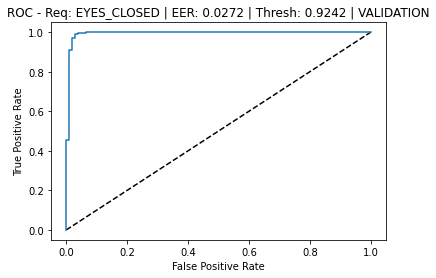

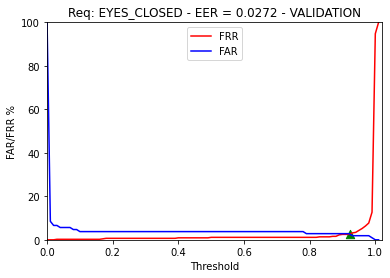

Requisite: EYES_CLOSED - EER_interp: 2.7199999999999998% - Best Threshold: 0.9241658307257191
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.98      0.94       106
    COMPLIANT       1.00      0.97      0.98       441

     accuracy                           0.97       547
    macro avg       0.95      0.98      0.96       547
 weighted avg       0.98      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 1.8900000000000001% | FRR: 2.7199999999999998% | EER_mean: 2.3% | TP: 429 | TN: 104 | FP: 2 | FN: 12
Accuracy ------------------------------------------------
Model Accuracy: 97.44%
---------------------------------------------------------
Requisite: CLOSE


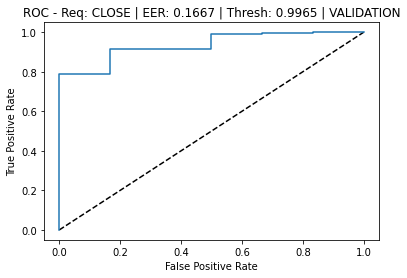

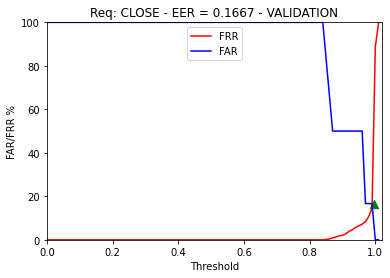

Requisite: CLOSE - EER_interp: 16.669999999999998% - Best Threshold: 0.9964603781700139
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.04      0.83      0.08         6
    COMPLIANT       1.00      0.79      0.88       541

     accuracy                           0.79       547
    macro avg       0.52      0.81      0.48       547
 weighted avg       0.99      0.79      0.87       547

Confusion matrix ----------------------------------------
FAR: 16.669999999999998% | FRR: 20.89% | EER_mean: 18.78% | TP: 428 | TN: 5 | FP: 1 | FN: 113
Accuracy ------------------------------------------------
Model Accuracy: 79.16%
---------------------------------------------------------
Requisite: HAT


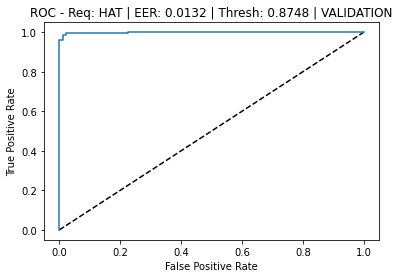

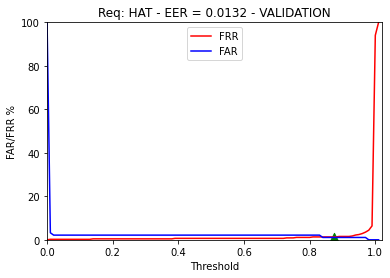

Requisite: HAT - EER_interp: 1.32% - Best Threshold: 0.8747948229575473
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.94      0.99      0.96        93
    COMPLIANT       1.00      0.99      0.99       454

     accuracy                           0.99       547
    macro avg       0.97      0.99      0.98       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 1.08% | FRR: 1.32% | EER_mean: 1.2% | TP: 448 | TN: 92 | FP: 1 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 98.72%
---------------------------------------------------------
Requisite: DARK_GLASSES


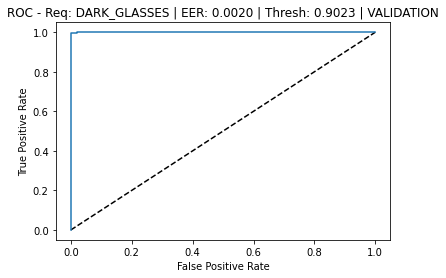

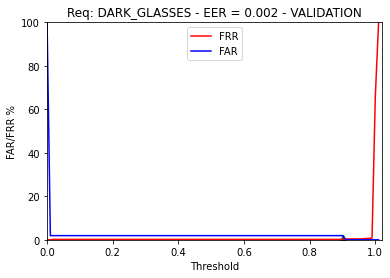

Requisite: DARK_GLASSES - EER_interp: 0.2% - Best Threshold: 0.9023243792129285
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.98      1.00      0.99        52
    COMPLIANT       1.00      1.00      1.00       495

     accuracy                           1.00       547
    macro avg       0.99      1.00      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.2% | EER_mean: 0.1% | TP: 494 | TN: 52 | FP: 0 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.82%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


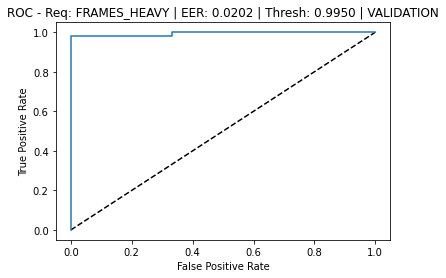

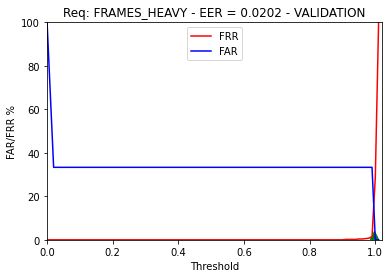

Requisite: FRAMES_HEAVY - EER_interp: 2.02% - Best Threshold: 0.9949908140389359
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.21      1.00      0.35         3
    COMPLIANT       1.00      0.98      0.99       544

     accuracy                           0.98       547
    macro avg       0.61      0.99      0.67       547
 weighted avg       1.00      0.98      0.99       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 2.02% | EER_mean: 1.01% | TP: 533 | TN: 3 | FP: 0 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 97.99%
---------------------------------------------------------
Requisite: FRAME_EYES


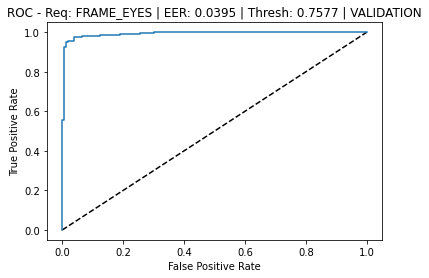

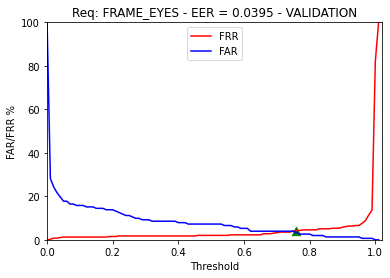

Requisite: FRAME_EYES - EER_interp: 3.95% - Best Threshold: 0.7577251195909461
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.96      0.93       152
    COMPLIANT       0.98      0.96      0.97       395

     accuracy                           0.96       547
    macro avg       0.94      0.96      0.95       547
 weighted avg       0.96      0.96      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.95% | FRR: 4.3% | EER_mean: 4.12% | TP: 378 | TN: 146 | FP: 6 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 95.8%
---------------------------------------------------------
Requisite: FLASH_LENSES


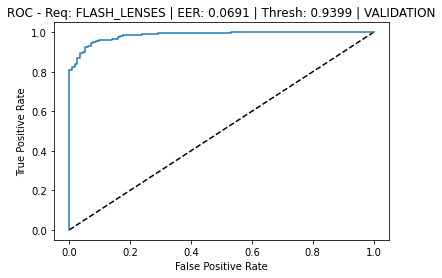

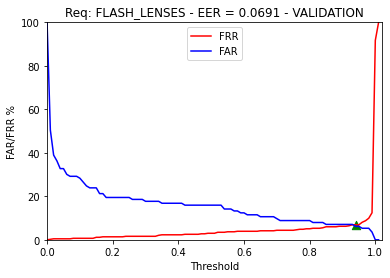

Requisite: FLASH_LENSES - EER_interp: 6.909999999999999% - Best Threshold: 0.9398983357139445
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.94      0.85       113
    COMPLIANT       0.98      0.93      0.96       434

     accuracy                           0.93       547
    macro avg       0.88      0.93      0.90       547
 weighted avg       0.94      0.93      0.93       547

Confusion matrix ----------------------------------------
FAR: 6.1899999999999995% | FRR: 6.909999999999999% | EER_mean: 6.550000000000001% | TP: 404 | TN: 106 | FP: 7 | FN: 30
Accuracy ------------------------------------------------
Model Accuracy: 93.24%
---------------------------------------------------------
Requisite: VEIL


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


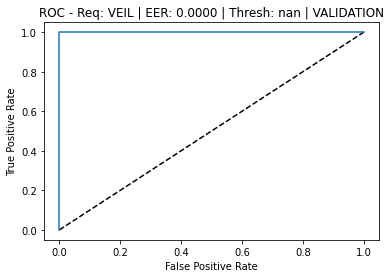

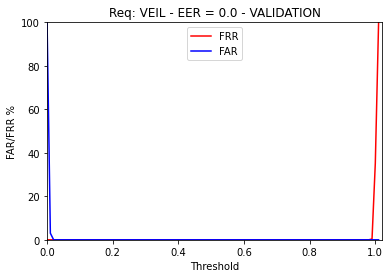

Requisite: VEIL - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00        33
    COMPLIANT       0.94      1.00      0.97       514

     accuracy                           0.94       547
    macro avg       0.47      0.50      0.48       547
 weighted avg       0.88      0.94      0.91       547

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 514 | TN: 0 | FP: 33 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 93.97%
---------------------------------------------------------
Requisite: REFLECTION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


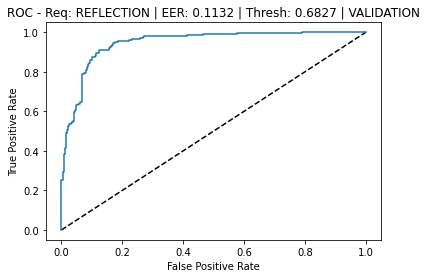

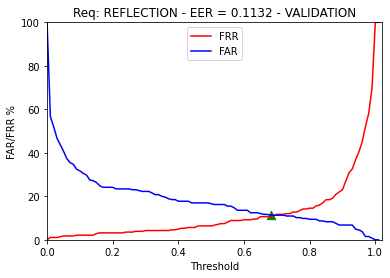

Requisite: REFLECTION - EER_interp: 11.32% - Best Threshold: 0.6827064752532941
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.89      0.89       265
    COMPLIANT       0.89      0.89      0.89       282

     accuracy                           0.89       547
    macro avg       0.89      0.89      0.89       547
 weighted avg       0.89      0.89      0.89       547

Confusion matrix ----------------------------------------
FAR: 11.32% | FRR: 10.639999999999999% | EER_mean: 10.979999999999999% | TP: 252 | TN: 235 | FP: 30 | FN: 30
Accuracy ------------------------------------------------
Model Accuracy: 89.03%
---------------------------------------------------------
Requisite: LIGHT


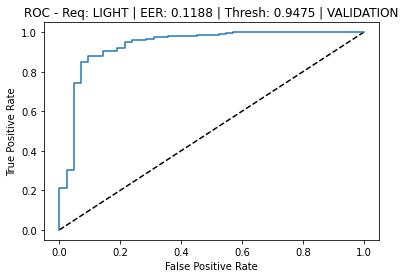

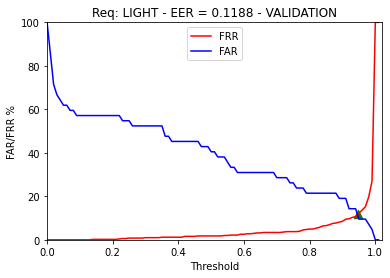

Requisite: LIGHT - EER_interp: 11.88% - Best Threshold: 0.9474864053253789
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      0.88      0.53        42
    COMPLIANT       0.99      0.88      0.93       505

     accuracy                           0.88       547
    macro avg       0.69      0.88      0.73       547
 weighted avg       0.94      0.88      0.90       547

Confusion matrix ----------------------------------------
FAR: 11.899999999999999% | FRR: 11.88% | EER_mean: 11.89% | TP: 445 | TN: 37 | FP: 5 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 88.12%
---------------------------------------------------------
Requisite: SH_FACE


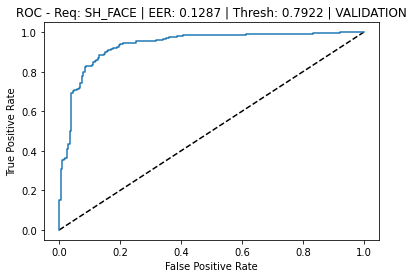

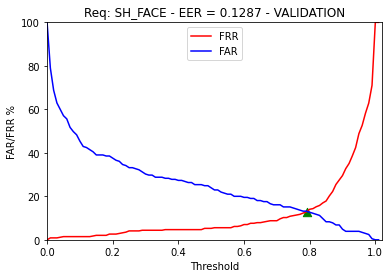

Requisite: SH_FACE - EER_interp: 12.870000000000001% - Best Threshold: 0.7922486188816007
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      0.87      0.84       205
    COMPLIANT       0.92      0.87      0.89       342

     accuracy                           0.87       547
    macro avg       0.86      0.87      0.87       547
 weighted avg       0.88      0.87      0.87       547

Confusion matrix ----------------------------------------
FAR: 12.68% | FRR: 12.870000000000001% | EER_mean: 12.78% | TP: 298 | TN: 179 | FP: 26 | FN: 44
Accuracy ------------------------------------------------
Model Accuracy: 87.2%
---------------------------------------------------------
Requisite: SH_HEAD


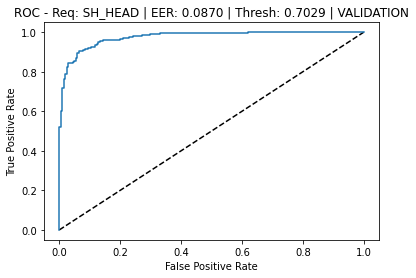

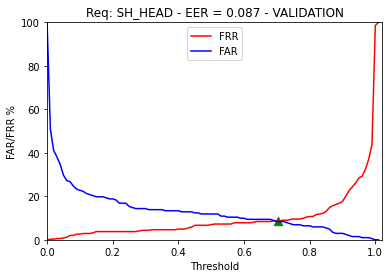

Requisite: SH_HEAD - EER_interp: 8.7% - Best Threshold: 0.7028596893600936
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.92      0.89       202
    COMPLIANT       0.95      0.91      0.93       345

     accuracy                           0.91       547
    macro avg       0.90      0.91      0.91       547
 weighted avg       0.92      0.91      0.91       547

Confusion matrix ----------------------------------------
FAR: 8.42% | FRR: 8.7% | EER_mean: 8.559999999999999% | TP: 315 | TN: 185 | FP: 17 | FN: 30
Accuracy ------------------------------------------------
Model Accuracy: 91.41%
---------------------------------------------------------
Requisite: BLURRED


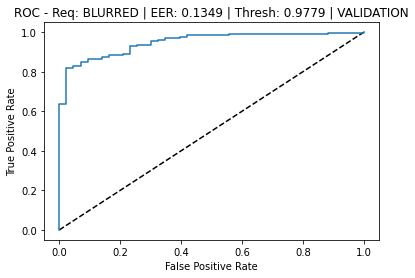

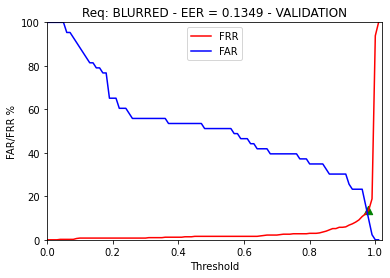

Requisite: BLURRED - EER_interp: 13.489999999999998% - Best Threshold: 0.9779154322450143
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.36      0.88      0.51        43
    COMPLIANT       0.99      0.87      0.92       504

     accuracy                           0.87       547
    macro avg       0.67      0.87      0.72       547
 weighted avg       0.94      0.87      0.89       547

Confusion matrix ----------------------------------------
FAR: 11.63% | FRR: 13.489999999999998% | EER_mean: 12.559999999999999% | TP: 436 | TN: 38 | FP: 5 | FN: 68
Accuracy ------------------------------------------------
Model Accuracy: 86.65%
---------------------------------------------------------
Requisite: SKIN_TONE


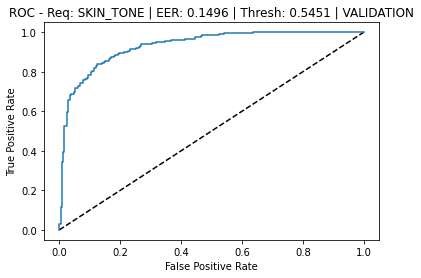

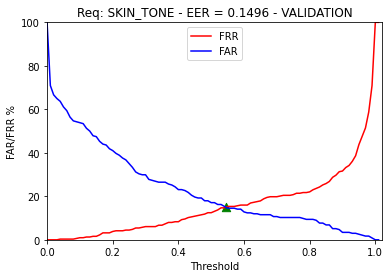

Requisite: SKIN_TONE - EER_interp: 14.96% - Best Threshold: 0.5451059341437359
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.81      0.85      0.83       234
    COMPLIANT       0.88      0.85      0.87       313

     accuracy                           0.85       547
    macro avg       0.85      0.85      0.85       547
 weighted avg       0.85      0.85      0.85       547

Confusion matrix ----------------------------------------
FAR: 14.96% | FRR: 15.02% | EER_mean: 14.99% | TP: 266 | TN: 199 | FP: 35 | FN: 47
Accuracy ------------------------------------------------
Model Accuracy: 85.00999999999999%
---------------------------------------------------------
Requisite: WASHED_OUT


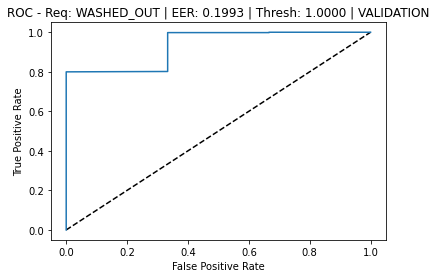

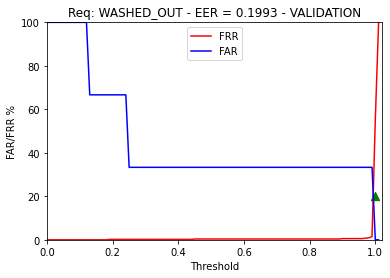

Requisite: WASHED_OUT - EER_interp: 19.93% - Best Threshold: 0.9999886517986737
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.03      1.00      0.05         3
    COMPLIANT       1.00      0.80      0.89       544

     accuracy                           0.80       547
    macro avg       0.51      0.90      0.47       547
 weighted avg       0.99      0.80      0.88       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 20.04% | EER_mean: 10.02% | TP: 435 | TN: 3 | FP: 0 | FN: 109
Accuracy ------------------------------------------------
Model Accuracy: 80.07%
---------------------------------------------------------
Requisite: PIXELATION


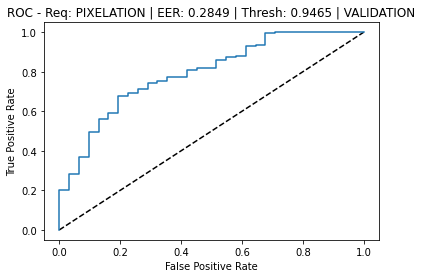

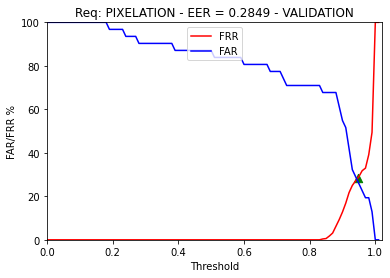

Requisite: PIXELATION - EER_interp: 28.49% - Best Threshold: 0.9464804020732007
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.14      0.74      0.23        31
    COMPLIANT       0.98      0.72      0.83       516

     accuracy                           0.72       547
    macro avg       0.56      0.73      0.53       547
 weighted avg       0.93      0.72      0.79       547

Confusion matrix ----------------------------------------
FAR: 25.81% | FRR: 28.49% | EER_mean: 27.150000000000002% | TP: 369 | TN: 23 | FP: 8 | FN: 147
Accuracy ------------------------------------------------
Model Accuracy: 71.66%
---------------------------------------------------------
Requisite: HAIR_EYES


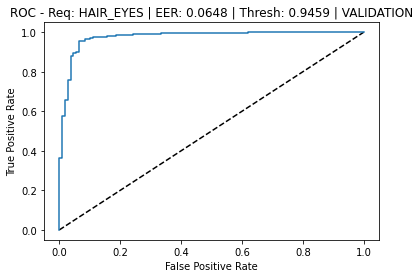

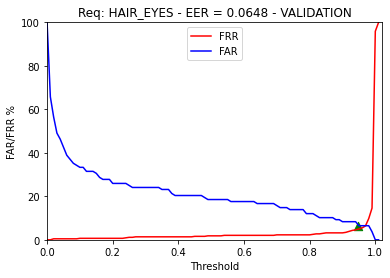

Requisite: HAIR_EYES - EER_interp: 6.4799999999999995% - Best Threshold: 0.9458957910535372
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.83      0.94      0.88       108
    COMPLIANT       0.98      0.95      0.97       439

     accuracy                           0.95       547
    macro avg       0.91      0.94      0.93       547
 weighted avg       0.95      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 6.4799999999999995% | FRR: 4.5600000000000005% | EER_mean: 5.52% | TP: 419 | TN: 101 | FP: 7 | FN: 20
Accuracy ------------------------------------------------
Model Accuracy: 95.06%
---------------------------------------------------------
Requisite: BACKGROUND


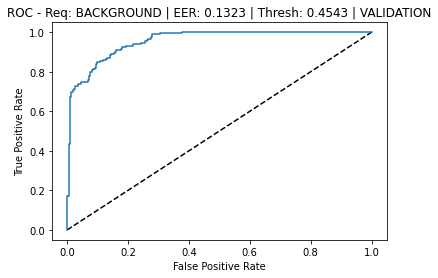

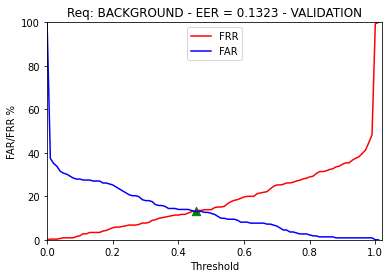

Requisite: BACKGROUND - EER_interp: 13.23% - Best Threshold: 0.4542514282923479
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.87      0.84       222
    COMPLIANT       0.91      0.87      0.89       325

     accuracy                           0.87       547
    macro avg       0.86      0.87      0.86       547
 weighted avg       0.87      0.87      0.87       547

Confusion matrix ----------------------------------------
FAR: 13.059999999999999% | FRR: 13.23% | EER_mean: 13.139999999999999% | TP: 282 | TN: 193 | FP: 29 | FN: 43
Accuracy ------------------------------------------------
Model Accuracy: 86.83999999999999%
---------------------------------------------------------
Requisite: RED_EYES


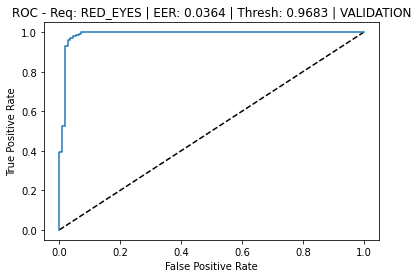

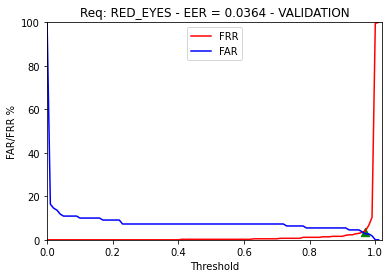

Requisite: RED_EYES - EER_interp: 3.64% - Best Threshold: 0.9683499336244252
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.96      0.91       110
    COMPLIANT       0.99      0.96      0.97       437

     accuracy                           0.96       547
    macro avg       0.92      0.96      0.94       547
 weighted avg       0.96      0.96      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.64% | FRR: 4.12% | EER_mean: 3.88% | TP: 419 | TN: 106 | FP: 4 | FN: 18
Accuracy ------------------------------------------------
Model Accuracy: 95.98%
---------------------------------------------------------


In [16]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 18s 2s/step
Prediction finished!
Requisite: MOUTH


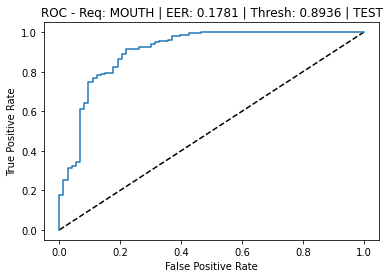

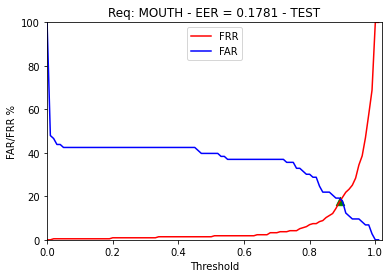

Requisite: MOUTH - EER_interp: 17.810000000000002% - Best Threshold: 0.8936446309089267
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.61      0.82      0.70        73
    COMPLIANT       0.93      0.82      0.87       215

     accuracy                           0.82       288
    macro avg       0.77      0.82      0.79       288
 weighted avg       0.85      0.82      0.83       288

Confusion matrix ----------------------------------------
FAR: 17.810000000000002% | FRR: 17.669999999999998% | EER_mean: 17.740000000000002% | TP: 177 | TN: 60 | FP: 13 | FN: 38
Accuracy ------------------------------------------------
Model Accuracy: 82.28999999999999%
---------------------------------------------------------
Requisite: ROTATION


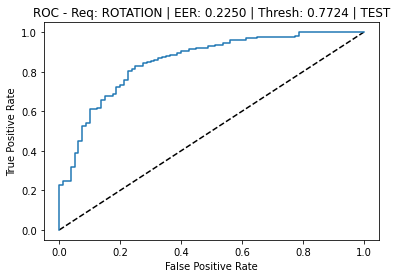

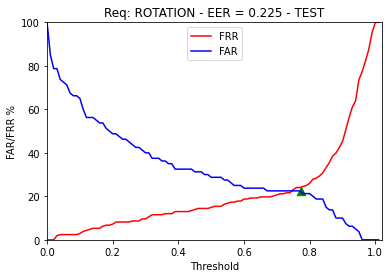

Requisite: ROTATION - EER_interp: 22.5% - Best Threshold: 0.7724102735521549
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.55      0.78      0.65        80
    COMPLIANT       0.90      0.76      0.82       208

     accuracy                           0.76       288
    macro avg       0.73      0.77      0.73       288
 weighted avg       0.80      0.76      0.77       288

Confusion matrix ----------------------------------------
FAR: 22.5% | FRR: 24.04% | EER_mean: 23.27% | TP: 158 | TN: 62 | FP: 18 | FN: 50
Accuracy ------------------------------------------------
Model Accuracy: 76.39%
---------------------------------------------------------
Requisite: L_AWAY


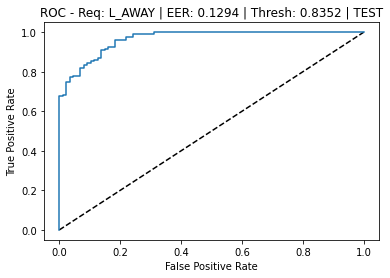

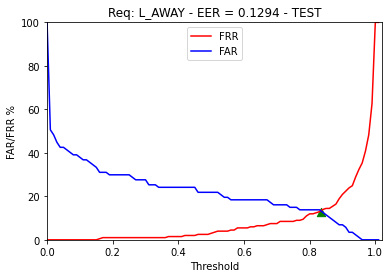

Requisite: L_AWAY - EER_interp: 12.94% - Best Threshold: 0.8352036716332606
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.75      0.87      0.80        87
    COMPLIANT       0.94      0.87      0.90       201

     accuracy                           0.87       288
    macro avg       0.84      0.87      0.85       288
 weighted avg       0.88      0.87      0.87       288

Confusion matrix ----------------------------------------
FAR: 12.64% | FRR: 12.94% | EER_mean: 12.790000000000001% | TP: 175 | TN: 76 | FP: 11 | FN: 26
Accuracy ------------------------------------------------
Model Accuracy: 87.15%
---------------------------------------------------------
Requisite: EYES_CLOSED


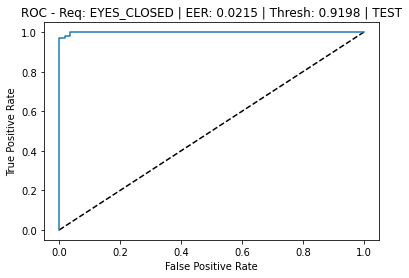

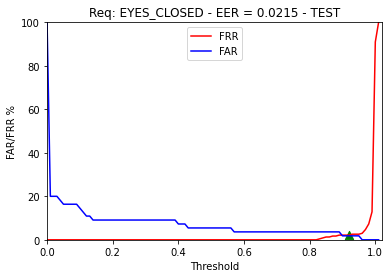

Requisite: EYES_CLOSED - EER_interp: 2.15% - Best Threshold: 0.9197865959912057
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.98      0.95        55
    COMPLIANT       1.00      0.98      0.99       233

     accuracy                           0.98       288
    macro avg       0.96      0.98      0.97       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 2.15% | EER_mean: 1.9800000000000002% | TP: 228 | TN: 54 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.92%
---------------------------------------------------------
Requisite: CLOSE


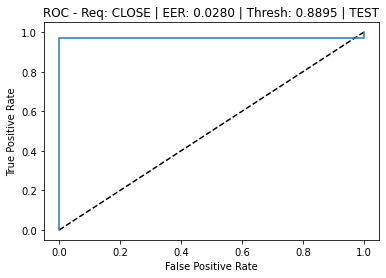

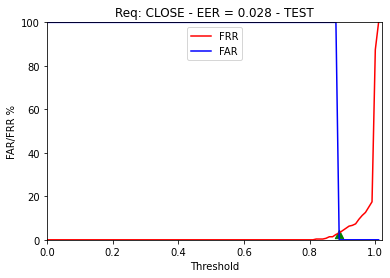

Requisite: CLOSE - EER_interp: 2.8000000000000003% - Best Threshold: 0.8894774651193952
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.20      1.00      0.33         2
    COMPLIANT       1.00      0.97      0.99       286

     accuracy                           0.97       288
    macro avg       0.60      0.99      0.66       288
 weighted avg       0.99      0.97      0.98       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 2.8000000000000003% | EER_mean: 1.4000000000000001% | TP: 278 | TN: 2 | FP: 0 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 97.22%
---------------------------------------------------------
Requisite: HAT


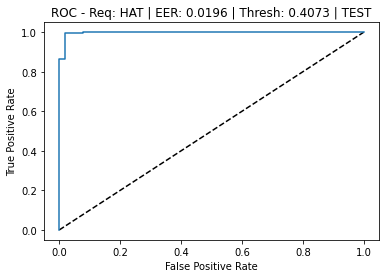

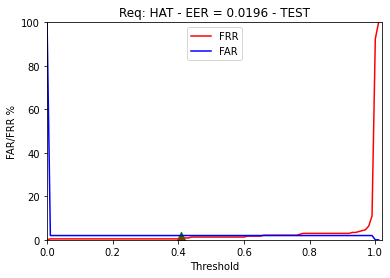

Requisite: HAT - EER_interp: 1.96% - Best Threshold: 0.40731081365857397
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.98      0.98      0.98        51
    COMPLIANT       1.00      1.00      1.00       237

     accuracy                           0.99       288
    macro avg       0.99      0.99      0.99       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 1.96% | FRR: 0.42% | EER_mean: 1.1900000000000002% | TP: 236 | TN: 50 | FP: 1 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: DARK_GLASSES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


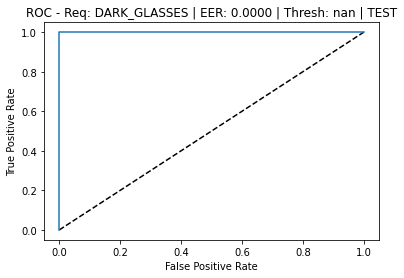

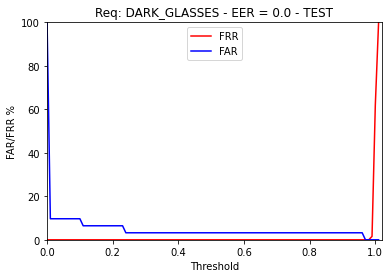

Requisite: DARK_GLASSES - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00        31
    COMPLIANT       0.89      1.00      0.94       257

     accuracy                           0.89       288
    macro avg       0.45      0.50      0.47       288
 weighted avg       0.80      0.89      0.84       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 257 | TN: 0 | FP: 31 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 89.24%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


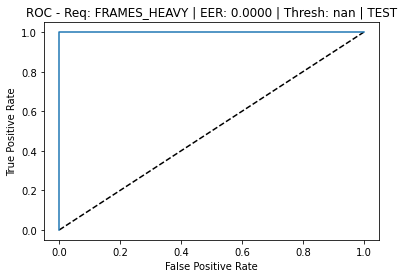

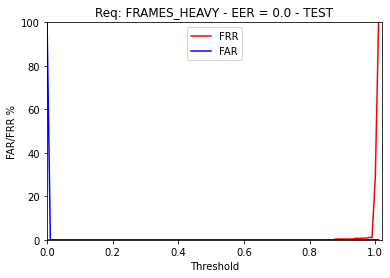

Requisite: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         2
    COMPLIANT       0.99      1.00      1.00       286

     accuracy                           0.99       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 286 | TN: 0 | FP: 2 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


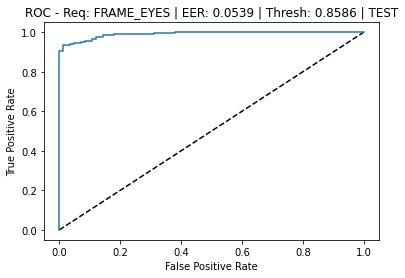

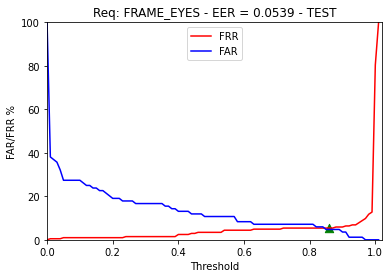

Requisite: FRAME_EYES - EER_interp: 5.390000000000001% - Best Threshold: 0.8585568403496461
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.95      0.91        84
    COMPLIANT       0.98      0.95      0.96       204

     accuracy                           0.95       288
    macro avg       0.93      0.95      0.94       288
 weighted avg       0.95      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 4.760000000000001% | FRR: 5.390000000000001% | EER_mean: 5.08% | TP: 193 | TN: 80 | FP: 4 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 94.78999999999999%
---------------------------------------------------------
Requisite: FLASH_LENSES


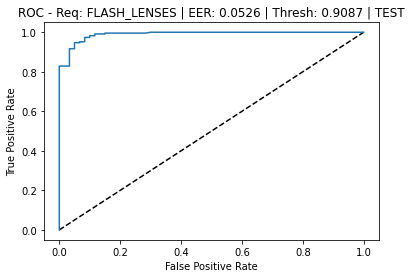

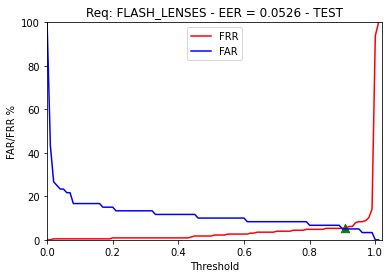

Requisite: FLASH_LENSES - EER_interp: 5.26% - Best Threshold: 0.9087221465612646
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.83      0.95      0.88        60
    COMPLIANT       0.99      0.95      0.97       228

     accuracy                           0.95       288
    macro avg       0.91      0.95      0.93       288
 weighted avg       0.95      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 5.0% | FRR: 5.26% | EER_mean: 5.13% | TP: 216 | TN: 57 | FP: 3 | FN: 12
Accuracy ------------------------------------------------
Model Accuracy: 94.78999999999999%
---------------------------------------------------------
Requisite: VEIL


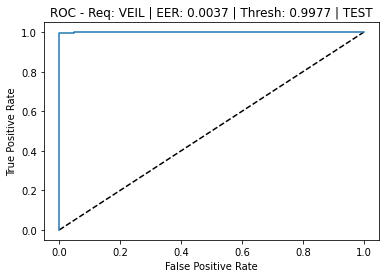

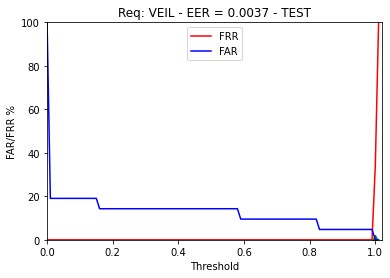

Requisite: VEIL - EER_interp: 0.37% - Best Threshold: 0.9976773442847006
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.95      1.00      0.98        21
    COMPLIANT       1.00      1.00      1.00       267

     accuracy                           1.00       288
    macro avg       0.98      1.00      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.37% | EER_mean: 0.18% | TP: 266 | TN: 21 | FP: 0 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: REFLECTION


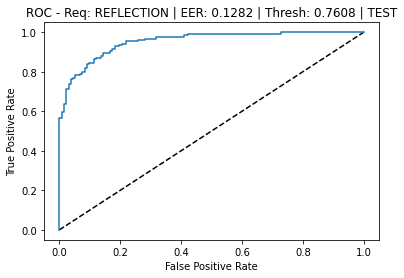

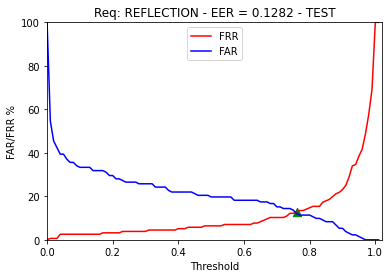

Requisite: REFLECTION - EER_interp: 12.82% - Best Threshold: 0.7607637964763847
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.88      0.87       132
    COMPLIANT       0.89      0.87      0.88       156

     accuracy                           0.88       288
    macro avg       0.87      0.88      0.87       288
 weighted avg       0.88      0.88      0.88       288

Confusion matrix ----------------------------------------
FAR: 12.120000000000001% | FRR: 12.82% | EER_mean: 12.47% | TP: 136 | TN: 116 | FP: 16 | FN: 20
Accuracy ------------------------------------------------
Model Accuracy: 87.5%
---------------------------------------------------------
Requisite: LIGHT


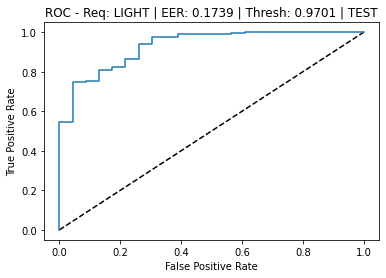

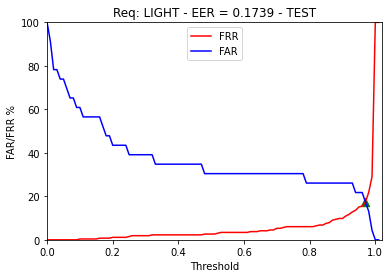

Requisite: LIGHT - EER_interp: 17.39% - Best Threshold: 0.9700762033462474
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.29      0.83      0.43        23
    COMPLIANT       0.98      0.83      0.90       265

     accuracy                           0.83       288
    macro avg       0.64      0.83      0.66       288
 weighted avg       0.93      0.83      0.86       288

Confusion matrix ----------------------------------------
FAR: 17.39% | FRR: 17.36% | EER_mean: 17.380000000000003% | TP: 219 | TN: 19 | FP: 4 | FN: 46
Accuracy ------------------------------------------------
Model Accuracy: 82.64%
---------------------------------------------------------
Requisite: SH_FACE


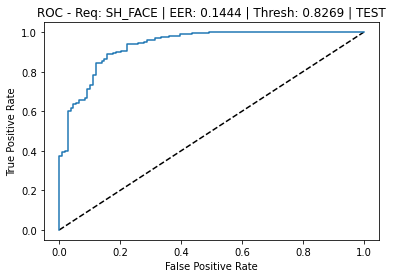

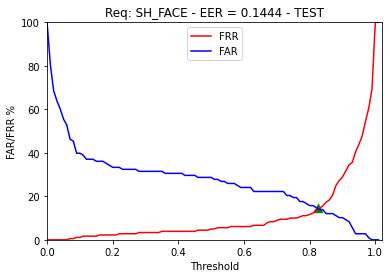

Requisite: SH_FACE - EER_interp: 14.44% - Best Threshold: 0.8268811583518847
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.86      0.82       108
    COMPLIANT       0.91      0.86      0.88       180

     accuracy                           0.86       288
    macro avg       0.85      0.86      0.85       288
 weighted avg       0.86      0.86      0.86       288

Confusion matrix ----------------------------------------
FAR: 13.889999999999999% | FRR: 14.44% | EER_mean: 14.16% | TP: 154 | TN: 93 | FP: 15 | FN: 26
Accuracy ------------------------------------------------
Model Accuracy: 85.76%
---------------------------------------------------------
Requisite: SH_HEAD


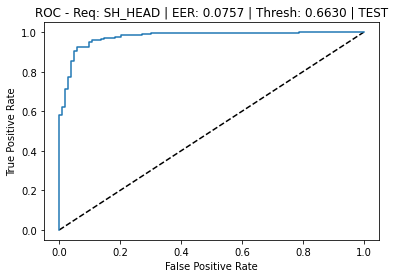

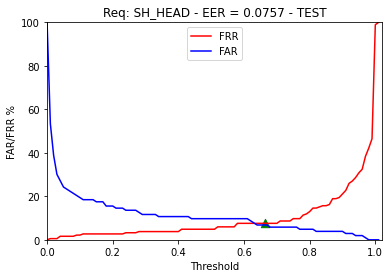

Requisite: SH_HEAD - EER_interp: 7.57% - Best Threshold: 0.6630214175650931
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.93      0.90       103
    COMPLIANT       0.96      0.92      0.94       185

     accuracy                           0.93       288
    macro avg       0.92      0.93      0.92       288
 weighted avg       0.93      0.93      0.93       288

Confusion matrix ----------------------------------------
FAR: 6.800000000000001% | FRR: 7.57% | EER_mean: 7.180000000000001% | TP: 171 | TN: 96 | FP: 7 | FN: 14
Accuracy ------------------------------------------------
Model Accuracy: 92.71000000000001%
---------------------------------------------------------
Requisite: BLURRED


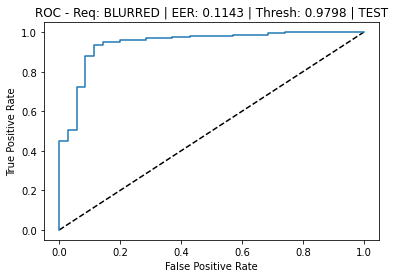

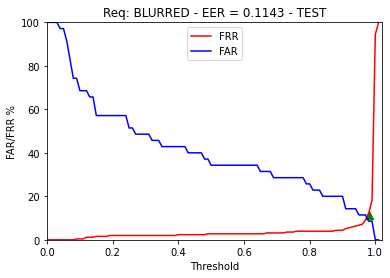

Requisite: BLURRED - EER_interp: 11.43% - Best Threshold: 0.9797621369361884
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.89      0.65        35
    COMPLIANT       0.98      0.88      0.93       253

     accuracy                           0.88       288
    macro avg       0.75      0.88      0.79       288
 weighted avg       0.92      0.88      0.89       288

Confusion matrix ----------------------------------------
FAR: 11.43% | FRR: 11.86% | EER_mean: 11.64% | TP: 223 | TN: 31 | FP: 4 | FN: 30
Accuracy ------------------------------------------------
Model Accuracy: 88.19%
---------------------------------------------------------
Requisite: SKIN_TONE


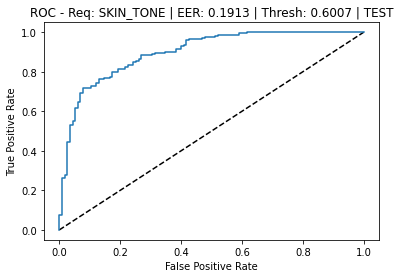

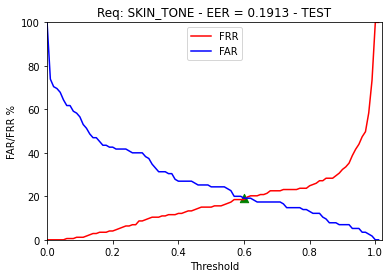

Requisite: SKIN_TONE - EER_interp: 19.13% - Best Threshold: 0.6007450222962495
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.74      0.81      0.78       115
    COMPLIANT       0.87      0.82      0.84       173

     accuracy                           0.81       288
    macro avg       0.80      0.81      0.81       288
 weighted avg       0.82      0.81      0.81       288

Confusion matrix ----------------------------------------
FAR: 19.13% | FRR: 18.5% | EER_mean: 18.81% | TP: 141 | TN: 93 | FP: 22 | FN: 32
Accuracy ------------------------------------------------
Model Accuracy: 81.25%
---------------------------------------------------------
Requisite: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


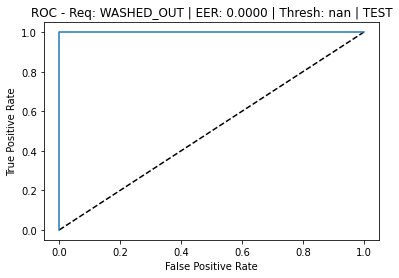

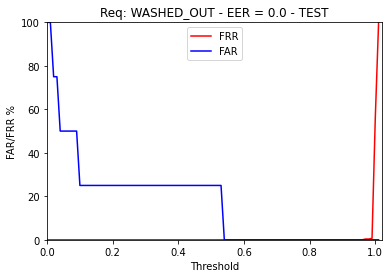

Requisite: WASHED_OUT - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         4
    COMPLIANT       0.99      1.00      0.99       284

     accuracy                           0.99       288
    macro avg       0.49      0.50      0.50       288
 weighted avg       0.97      0.99      0.98       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 284 | TN: 0 | FP: 4 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 98.61%
---------------------------------------------------------
Requisite: PIXELATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


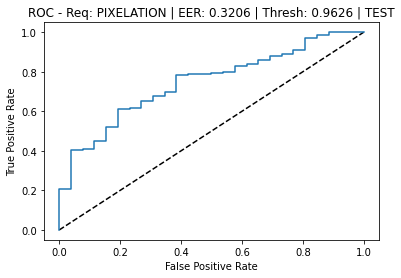

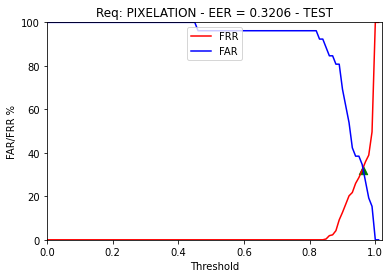

Requisite: PIXELATION - EER_interp: 32.06% - Best Threshold: 0.9625703032690149
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.18      0.69      0.28        26
    COMPLIANT       0.96      0.68      0.79       262

     accuracy                           0.68       288
    macro avg       0.57      0.69      0.54       288
 weighted avg       0.89      0.68      0.75       288

Confusion matrix ----------------------------------------
FAR: 30.769999999999996% | FRR: 32.06% | EER_mean: 31.419999999999998% | TP: 178 | TN: 18 | FP: 8 | FN: 84
Accuracy ------------------------------------------------
Model Accuracy: 68.06%
---------------------------------------------------------
Requisite: HAIR_EYES


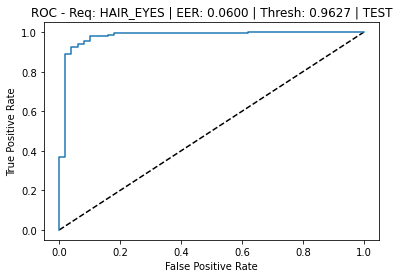

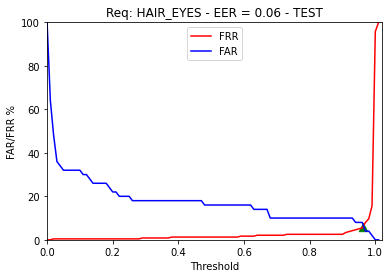

Requisite: HAIR_EYES - EER_interp: 6.0% - Best Threshold: 0.9627273082732404
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.94      0.85        50
    COMPLIANT       0.99      0.94      0.96       238

     accuracy                           0.94       288
    macro avg       0.88      0.94      0.91       288
 weighted avg       0.95      0.94      0.94       288

Confusion matrix ----------------------------------------
FAR: 6.0% | FRR: 5.88% | EER_mean: 5.94% | TP: 224 | TN: 47 | FP: 3 | FN: 14
Accuracy ------------------------------------------------
Model Accuracy: 94.1%
---------------------------------------------------------
Requisite: BACKGROUND


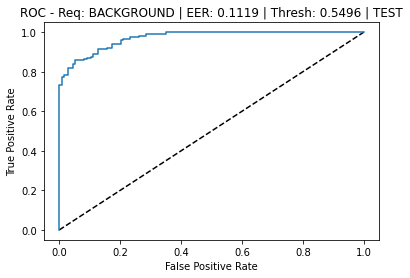

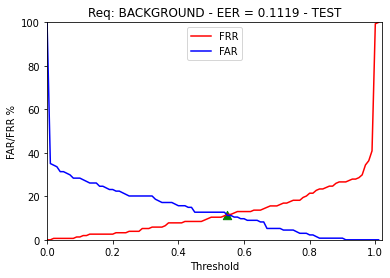

Requisite: BACKGROUND - EER_interp: 11.19% - Best Threshold: 0.5495944023132119
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.89      0.88       134
    COMPLIANT       0.90      0.89      0.90       154

     accuracy                           0.89       288
    macro avg       0.89      0.89      0.89       288
 weighted avg       0.89      0.89      0.89       288

Confusion matrix ----------------------------------------
FAR: 11.19% | FRR: 11.04% | EER_mean: 11.12% | TP: 137 | TN: 119 | FP: 15 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 88.89%
---------------------------------------------------------
Requisite: RED_EYES


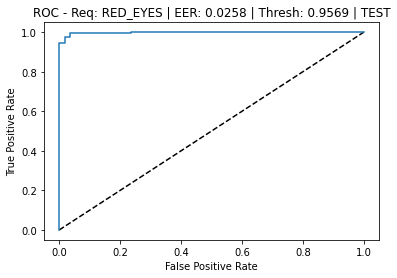

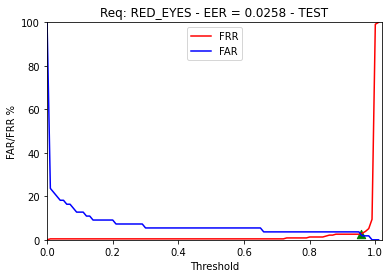

Requisite: RED_EYES - EER_interp: 2.58% - Best Threshold: 0.95690953219909
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.98      0.94        55
    COMPLIANT       1.00      0.97      0.98       233

     accuracy                           0.98       288
    macro avg       0.95      0.98      0.96       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 2.58% | EER_mean: 2.1999999999999997% | TP: 227 | TN: 54 | FP: 1 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 97.57000000000001%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [18]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
